In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [13]:
predictwise = pd.read_csv('./data/predictwise.csv').set_index('States')

In [15]:
predictwise.head()

,Obama,Romney,Votes
States,,,
Alabama,0.000,1.000,9
Alaska,0.000,1.000,3
Arizona,0.062,0.938,11
Arkansas,0.000,1.000,6
California,1.000,0.000,55


# Simulating a simple election model

## Bernoulli random variables

[0 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 0]


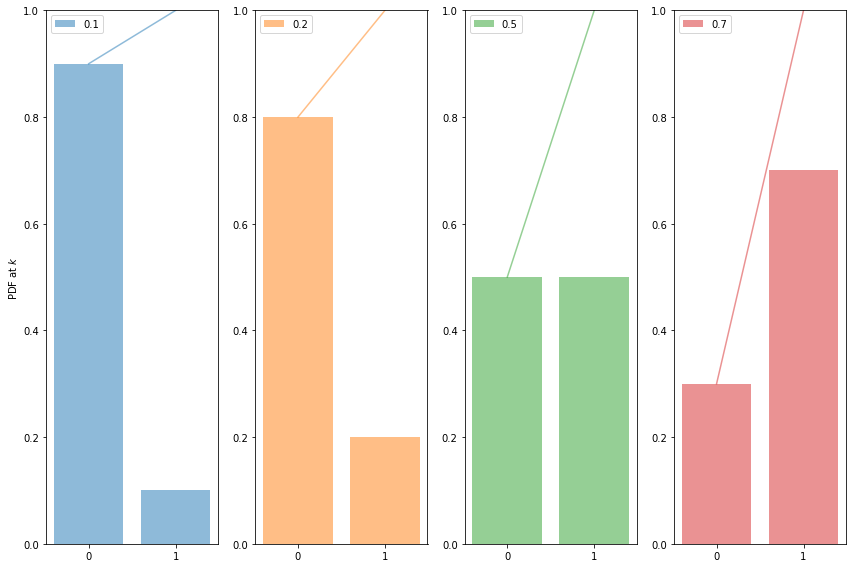

In [21]:
from scipy.stats import bernoulli
import seaborn as sns
#bernoulli random variable
brv=bernoulli(p=0.3)
print(brv.rvs(size=20))
event_space=[0,1]
plt.figure(figsize=(12,8))
colors=sns.color_palette()
for i, p in enumerate([0.1, 0.2, 0.5, 0.7]):
    ax = plt.subplot(1, 4, i+1)
    plt.bar(event_space, bernoulli.pmf(event_space, p), label=p, color=colors[i], alpha=0.5)
    plt.plot(event_space, bernoulli.cdf(event_space, p), color=colors[i], alpha=0.5)

    ax.xaxis.set_ticks(event_space)
   
    plt.ylim((0,1))
    plt.legend(loc=0)
    if i == 0:
        plt.ylabel("PDF at $k$")
plt.tight_layout()

## Running the simulation using Uniform distribution

In [59]:
def simulate_election(model, n_sim):
    simulations = np.random.uniform(size=(51, n_sim))
    obama_votes = (simulations < model.Obama.values.reshape(-1, 1)) * model.Votes.values.reshape(-1, 1)
    #summing over rows gives the total electoral votes for each simulation
    return obama_votes.sum(axis=0)


In [60]:
result = simulate_election(predictwise, 10000)
# number of times Obama won in 10K simulated elections
print((result >= 269).sum())

9965


There are roughly only 50 simulations in which Romney wins the election!

# Displaying the prediction

In [78]:
def plot_simulation(simulation):    
    plt.hist(simulation, bins=np.arange(200, 538, 1), 
             label='simulations', align='left', normed=True)
    plt.axvline(332, 0, .5, color='r', label='Actual Outcome')
    plt.axvline(269, 0, .5, color='k', label='Victory Threshold')
    p05 = np.percentile(simulation, 5.)
    p95 = np.percentile(simulation, 95.)
    iq = int(p95 - p05)
    pwin = ((simulation >= 269).mean() * 100)
    plt.title("Chance of Obama Victory: %0.2f%%, Spread: %d votes" % (pwin, iq))
    plt.legend(frameon=False, loc='upper left')
    plt.xlabel("Obama Electoral College Votes")
    plt.ylabel("Probability")
    sns.despine()

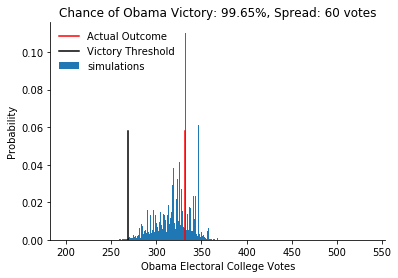

In [79]:
plot_simulation(result)

In [81]:
CDF = lambda x: np.sum(result < x)/result.shape[0]

In [86]:
CDF = lambda x: np.float(np.sum(result < x))/result.shape[0]
for votes in [200, 300, 320, 340, 360, 400, 500]:
    print("Obama Win CDF at votes=", votes, " is ", CDF(votes))


Obama Win CDF at votes= 200  is  0.0
Obama Win CDF at votes= 300  is  0.1486
Obama Win CDF at votes= 320  is  0.4526
Obama Win CDF at votes= 340  is  0.8381
Obama Win CDF at votes= 360  is  0.9976
Obama Win CDF at votes= 400  is  1.0
Obama Win CDF at votes= 500  is  1.0


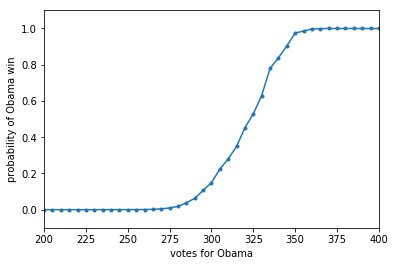

In [90]:
votelist=np.arange(0, 540, 5)
plt.plot(votelist, [CDF(v) for v in votelist], '.-');
plt.xlim([200,400])
plt.ylim([-0.1,1.1])
plt.xlabel("votes for Obama")
plt.ylabel("probability of Obama win");

# Binomial distribution

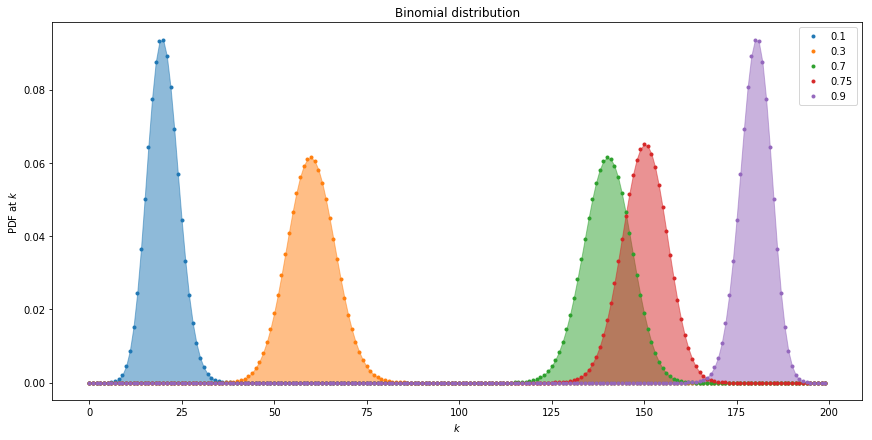

In [107]:
from scipy.stats import binom
plt.figure(figsize=(12,6))
k = np.arange(0, 200)
for p, color in zip([0.1, 0.3, 0.7, 0.75, 0.9], colors):
    rv = binom(200, p)
    plt.plot(k, rv.pmf(k), '.', lw=2, color=color, label=p)
    plt.fill_between(k, rv.pmf(k), color=color, alpha=0.5)
q=plt.legend()
plt.title("Binomial distribution")
plt.tight_layout()
q=plt.ylabel("PDF at $k$")
q=plt.xlabel("$k$")

# Monte Carlo Integration

We now use sampling to compute

$$I =  \int_{2}^{3}[x^2 + 4xsin(x)]dx$$

In [109]:
def f(x):
    return x**2 + 4*x*np.sin(x)

# closed from of integration
def intf(x):
    return x**3/3.0+4.0*np.sin(x) - 4.0*x*np.cos(x)   

In [149]:
a = 2
b = 3
N = 10000
X = np.random.uniform(low=a, high=b, size=N)
V = b-a
print('approximated integration: ', V * np.mean(Y))
print('exact integration: ', intf(b) - intf(a))

approximated integration:  11.8086464293
exact integration:  11.8113589251


In [161]:
trials = np.arange(1, 1000)
errors = []
true = intf(b) - intf(a)
errors = [V * np.mean(f(np.random.uniform(low=a, high=b, size=N))) - true for N in trials]
errors_2 = np.sqrt(np.power(errors,2))

Text(0,0.5,'sqrt(error^2)')

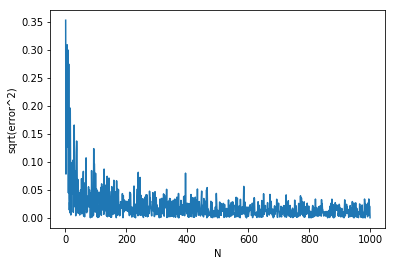

In [162]:
plt.plot(trials, errors_2);
ax=plt.gca()
ax.set_xlabel('N')
ax.set_ylabel('sqrt(error^2)')

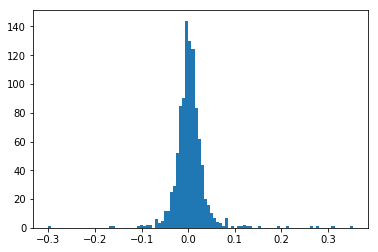

In [171]:
plt.hist(errors, bins=100);
